In [1]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # for model evaluation metrics
from sklearn.svm import SVC # for Support Vector Classification model

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget http://www.keshavmaheshwari.us/images/water_potability.csv

--2021-07-01 17:59:26--  http://www.keshavmaheshwari.us/images/water_potability.csv
Resolving www.keshavmaheshwari.us (www.keshavmaheshwari.us)... 18.205.222.128, 52.202.168.65, 54.237.133.81, ...
Connecting to www.keshavmaheshwari.us (www.keshavmaheshwari.us)|18.205.222.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 525187 (513K) [text/csv]
Saving to: ‘water_potability.csv.8’

water_potability.cs 100%[===================>] 512.88K  --.-KB/s    in 0.02s   

2021-07-01 17:59:26 (22.8 MB/s) - ‘water_potability.csv.8’ saved [525187/525187]



In [3]:
water_data = pd.read_csv('water_potability.csv')
water_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
def impute_missing_data(data):
  # split into 1/0
  data_pos = data[data['Potability'] == 1]
  data_neg = data[data['Potability'] == 0]

  # col:
  col = list(data.columns)

  # fill missing data
  for i in range(len(data.columns)-1):
    data_pos[col[i]] = data_pos[col[i]].fillna(value=data_pos[col[i]].mean())
    data_neg[col[i]] = data_neg[col[i]].fillna(value=data_neg[col[i]].mean())

    # combine data
    data_fill = pd.concat([data_pos, data_neg], ignore_index=True)

  return data_fill

In [5]:
data = impute_missing_data(water_data)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
1,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
2,7.073783,169.974849,23403.637304,8.519730,332.566990,475.573562,12.924107,50.861913,2.747313,1
3,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
4,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
3271,6.616731,195.096968,34277.760400,7.632639,334.564290,417.465080,13.432557,47.945936,3.622379,0
3272,7.734569,230.919506,21776.594455,6.908591,334.564290,395.114961,15.033557,92.697369,3.821456,0
3273,6.971577,185.906938,27959.987873,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,0
3274,4.709187,179.141018,22291.418577,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084,0


In [6]:
svm_map = {1: 1.0, 0: -1.0}
data['Potability'] = data['Potability'].map(svm_map)
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1.0
1,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1.0
2,7.073783,169.974849,23403.637304,8.519730,332.566990,475.573562,12.924107,50.861913,2.747313,1.0
3,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1.0
4,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1.0
...,...,...,...,...,...,...,...,...,...,...
3271,6.616731,195.096968,34277.760400,7.632639,334.564290,417.465080,13.432557,47.945936,3.622379,-1.0
3272,7.734569,230.919506,21776.594455,6.908591,334.564290,395.114961,15.033557,92.697369,3.821456,-1.0
3273,6.971577,185.906938,27959.987873,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,-1.0
3274,4.709187,179.141018,22291.418577,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084,-1.0


In [7]:
Y = data.loc[:, 'Potability']
X = data.iloc[:, :-1]

In [8]:
X_norm = MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(X_norm)

In [9]:
X

,0,1,2,3,4,5,6,7,8
0,0.674652,0.356824,0.210940,0.711739,0.515817,0.719015,0.245456,0.623383,0.458530
1,0.644632,0.292590,0.320800,0.599955,0.486180,0.471549,0.481642,0.592559,0.479344
2,0.505270,0.444492,0.378987,0.639353,0.578265,0.514270,0.410885,0.406645,0.245285
3,0.485723,0.705773,0.637413,0.716219,0.165243,0.340946,0.353734,0.592553,0.454706
4,0.512438,0.565765,0.329690,0.573762,0.449068,0.234439,0.472548,0.597651,0.470769
...,...,...,...,...,...,...,...,...,...
3271,0.472624,0.535616,0.557526,0.569913,0.583939,0.412657,0.430366,0.382989,0.410735
3272,0.552469,0.665553,0.352273,0.513236,0.583939,0.373573,0.491707,0.746048,0.448375
3273,0.497970,0.502281,0.453797,0.537183,0.627059,0.406715,0.677506,0.287526,0.335857
3274,0.336370,0.477740,0.360726,0.502722,0.790891,0.331867,0.612521,0.696002,0.455679


In [10]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [25]:
def fitting(X, y, C, gamma):
    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Fit the model
    # Note, available kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
    model = SVC(kernel='poly', probability=True, C=C, gamma=gamma)
    clf = model.fit(X_train, y_train)

    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)

    # Use score method to get accuracy of the model
    print('----- Evaluation on Test Data -----')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')

    print('----- Evaluation on Training Data -----')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')

    acc = accuracy_score(y_test, pred_labels_te)
    # ax = sns.heatmap(confusion_matrix(y_test, pred_labels_te), annot=True, fmt="d", cmap='YlGnBu')
    # ax.set(title = "SVM heatmap")
    # plt.title('Confusion Matrix')
    # plt.xlabel('Predicted Label')
    # plt.ylabel('True Label')

    return acc

In [23]:
acc = fitting(X, Y, 1, 'scale')

----- Evaluation on Test Data -----
Accuracy Score:  0.7027439024390244
              precision    recall  f1-score   support

        -1.0       0.70      0.94      0.80       415
         1.0       0.73      0.30      0.42       241

    accuracy                           0.70       656
   macro avg       0.72      0.62      0.61       656
weighted avg       0.71      0.70      0.66       656

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7057251908396946
              precision    recall  f1-score   support

        -1.0       0.68      0.96      0.80      1583
         1.0       0.85      0.31      0.46      1037

    accuracy                           0.71      2620
   macro avg       0.76      0.64      0.63      2620
weighted avg       0.75      0.71      0.66      2620

--------------------------------------------------------


In [18]:
acc_li = []

for i in [0.2, 0.4, 0.6, 0.8, 1]:
  print("######## now i is " + str(i))
  acc = fitting(X, Y, i, 'scale')
  acc_li.append(acc)

print(acc_li)

######## now i is 0.2
----- Evaluation on Test Data -----
Accuracy Score:  0.6280487804878049
              precision    recall  f1-score   support

        -1.0       0.62      0.98      0.76       398
         1.0       0.73      0.09      0.15       258

    accuracy                           0.63       656
   macro avg       0.68      0.53      0.46       656
weighted avg       0.67      0.63      0.52       656

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6526717557251909
              precision    recall  f1-score   support

        -1.0       0.64      0.99      0.78      1600
         1.0       0.89      0.12      0.22      1020

    accuracy                           0.65      2620
   macro avg       0.77      0.56      0.50      2620
weighted avg       0.74      0.65      0.56      2620

--------------------------------------------------------
######## now i is 0.4
----- Evaluation on Test Data -----
Accu

In [13]:
C = [i for i in [0.2, 0.4, 0.6, 0.8, 1.0]]
C

[0.2, 0.4, 0.6, 0.8, 1.0]

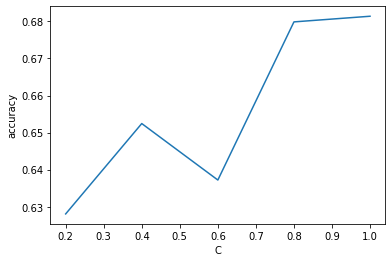

In [19]:
plt.plot(C, acc_li)
plt.xlabel('C')
plt.ylabel('accuracy')
plt.title("")
plt.show()

In [27]:
gamma_lst = []
for i in [0.2, 0.4, 0.6, 0.8, 1.0]:
  print("######## now i is " + str(i))
  acc = fitting(X, Y, 1, i)
  gamma_lst.append(acc)


######## now i is 0.2
----- Evaluation on Test Data -----
Accuracy Score:  0.6219512195121951
              precision    recall  f1-score   support

        -1.0       0.62      1.00      0.77       408
         1.0       0.00      0.00      0.00       248

    accuracy                           0.62       656
   macro avg       0.31      0.50      0.38       656
weighted avg       0.39      0.62      0.48       656

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6068702290076335
              precision    recall  f1-score   support

        -1.0       0.61      1.00      0.76      1590
         1.0       0.00      0.00      0.00      1030

    accuracy                           0.61      2620
   macro avg       0.30      0.50      0.38      2620
weighted avg       0.37      0.61      0.46      2620

--------------------------------------------------------
######## now i is 0.4


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----- Evaluation on Test Data -----
Accuracy Score:  0.6204268292682927
              precision    recall  f1-score   support

        -1.0       0.62      1.00      0.76       405
         1.0       0.75      0.01      0.02       251

    accuracy                           0.62       656
   macro avg       0.68      0.50      0.39       656
weighted avg       0.67      0.62      0.48       656

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6091603053435114
              precision    recall  f1-score   support

        -1.0       0.61      1.00      0.76      1593
         1.0       1.00      0.00      0.01      1027

    accuracy                           0.61      2620
   macro avg       0.80      0.50      0.38      2620
weighted avg       0.76      0.61      0.46      2620

--------------------------------------------------------
######## now i is 0.6
----- Evaluation on Test Data -----
Accuracy Score:  0.6219512

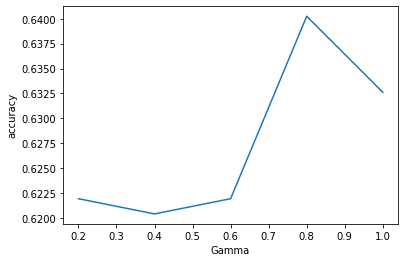

In [28]:
plt.plot(C, gamma_lst)
plt.xlabel('Gamma')
plt.ylabel('accuracy')
plt.show()

----- Evaluation on Test Data -----
Accuracy Score:  0.6844512195121951
              precision    recall  f1-score   support

        -1.0       0.68      0.94      0.79       406
         1.0       0.73      0.27      0.40       250

    accuracy                           0.68       656
   macro avg       0.70      0.61      0.59       656
weighted avg       0.70      0.68      0.64       656

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6965648854961832
              precision    recall  f1-score   support

        -1.0       0.68      0.93      0.79      1592
         1.0       0.75      0.34      0.46      1028

    accuracy                           0.70      2620
   macro avg       0.72      0.63      0.63      2620
weighted avg       0.71      0.70      0.66      2620

--------------------------------------------------------


0.6844512195121951

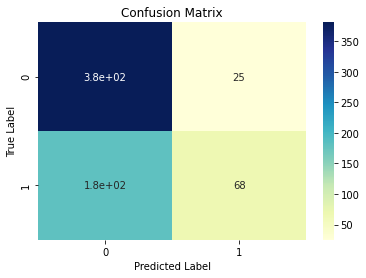

In [ ]:
acc = fitting(X, Y, C=1, gamma='scale')
acc

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test, pred_labels_te),
           annot=True,fmt="d",
           cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label');